<a href="https://colab.research.google.com/github/Arshbhatia23/Python-ML-Projects/blob/main/UBER_Data_Analysis_%26_UBER_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving New Uber Request Data.csv to New Uber Request Data.csv


{'New Uber Request Data.csv': b'Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp\r\n619,Airport,1,Trip Completed,11-07-2016 11:51,11-07-2016 13:00\r\n867,Airport,1,Trip Completed,11-07-2016 17:57,11-07-2016 18:47\r\n1807,City,1,Trip Completed,12-07-2016 09:17,12-07-2016 09:58\r\n2532,Airport,1,Trip Completed,12-07-2016 21:08,12-07-2016 22:03\r\n3112,City,1,Trip Completed,13-07-2016 08:33,13-07-2016 09:25\r\n3879,Airport,1,Trip Completed,13-07-2016 21:57,13-07-2016 22:28\r\n4270,Airport,1,Trip Completed,14-07-2016 06:15,14-07-2016 07:13\r\n5510,Airport,1,Trip Completed,15-07-2016 05:11,15-07-2016 06:07\r\n6248,City,1,Trip Completed,15-07-2016 17:57,15-07-2016 18:50\r\n267,City,2,Trip Completed,11-07-2016 06:46,11-07-2016 07:25\r\n1467,Airport,2,Trip Completed,12-07-2016 05:08,12-07-2016 06:02\r\n1983,City,2,Trip Completed,12-07-2016 12:30,12-07-2016 12:57\r\n2784,Airport,2,Trip Completed,13-07-2016 04:49,13-07-2016 05:23\r\n3075,City,2,Trip Completed,13-07-2016 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [3]:
# Loading the dataset
df = pd.read_csv('New Uber Request Data.csv')
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11-07-2016 11:51,11-07-2016 13:00
1,867,Airport,1.0,Trip Completed,11-07-2016 17:57,11-07-2016 18:47
2,1807,City,1.0,Trip Completed,12-07-2016 09:17,12-07-2016 09:58
3,2532,Airport,1.0,Trip Completed,12-07-2016 21:08,12-07-2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33,13-07-2016 09:25


In [4]:
# Print the shape of the data
print(df.shape)
print(df.describe())

(5310, 6)
        Request id    Driver id
count  5310.000000  3209.000000
mean   3122.318079   117.970396
std    1816.844714    68.510216
min       2.000000     1.000000
25%    1553.500000    60.000000
50%    3095.500000   117.000000
75%    4648.750000   176.000000
max    6766.000000   246.000000


In [5]:
# Correcting the datatypes
# to_datetime: it converts the given datetime format into Y-M-D Hr:Min:Sec format
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'])
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00


In [6]:
# Removing unnecessary columns
# 'Driver id' is removed as it is an extra column in the dataset
df = df.drop(['Driver id'], axis = 1)

In [7]:
df.tail()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp
5305,5426,Airport,No Cars Available,2016-07-15 02:22:00,NaT
5306,5429,Airport,No Cars Available,2016-07-15 02:38:00,NaT
5307,5433,City,No Cars Available,2016-07-15 02:41:00,NaT
5308,5432,Airport,No Cars Available,2016-07-15 02:42:00,NaT
5309,5438,City,No Cars Available,2016-07-15 02:59:00,NaT


In [8]:
# Step - 2 : Understand the dataset

# How many unique pickup points are present?
print(df['Pickup point'].unique())

['Airport' 'City']


In [9]:
# How many observations are present?
df.shape

(5310, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5310 entries, 0 to 5309
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         5310 non-null   int64         
 1   Pickup point       5310 non-null   object        
 2   Status             5310 non-null   object        
 3   Request timestamp  5310 non-null   datetime64[ns]
 4   Drop timestamp     2347 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 207.5+ KB


In [11]:
# Inspecting the Null values, column- wise
df.isnull().sum(axis = 0)

Request id              0
Pickup point            0
Status                  0
Request timestamp       0
Drop timestamp       2963
dtype: int64

In [12]:
# Here the 'Drop timestamp' is checked for null values and grouped acc. to 'Status'
# that is the status: 'Cancelled' or 'No Cars Available' 
# and the size or count is found out  
df[(df['Drop timestamp'].isnull())].groupby('Status').size()

Status
Cancelled             862
No Cars Available    2101
dtype: int64

In [13]:
# unique : All the unique elements are found
# len : No. of uniques are printed
print(len(df['Request id'].unique()))
print(len(df['Pickup point'].unique()))
print(len(df['Status'].unique()))

5310
2
3


In [14]:
# Checking if there are any duplicate values
len(df[df.duplicated()].index)

0

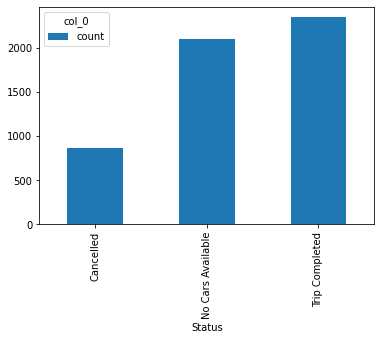

In [15]:
# Step - 3 : Univariate Analysis
status = pd.crosstab(index = df['Status'], columns = 'count')
status.plot.bar()

# Here we conclude that there is a lack of availability of the cars

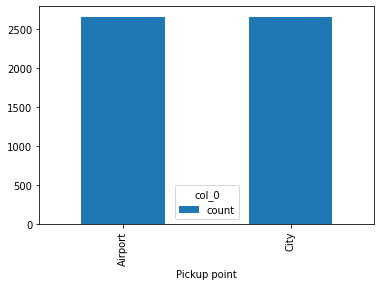

In [16]:
# Univariate analysis on Pickup Point column
pick_point = pd.crosstab(index = df['Pickup point'], columns = 'count')
pick_point.plot.bar()

# Here we conclude that there are almost equal no. of pickups from 'Airport' and 'City'

In [17]:
# Step - 4 : Bivariate Analysis
df.groupby(['Status', 'Pickup point']).size()

# Here we group the 'Pickup Point' acc to the 'Status' and give the exact no. of tasks

Status             Pickup point
Cancelled          Airport          143
                   City             719
No Cars Available  Airport         1401
                   City             700
Trip Completed     Airport         1116
                   City            1231
dtype: int64

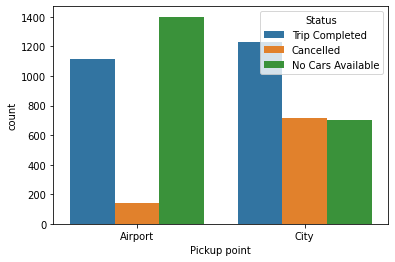

In [18]:
# Visualizing the count of Status and Pickup Point bivariate analysis
sns.countplot(x = df['Pickup point'], hue = df['Status'], data = df)

# There are very less cancellations from 'Airport' and there is lack of availability of cab at 'Airport'

In [19]:
# Step - 5 : Deriving New Metrics


# df['Col_name'] = df['Time col'].dt.hour
# hour : used to extract only hours from the data 
# second : used to extract only seconds from the data 
# minute : used to extract only minutes from the data 


# Request and Drop hours
df['Request Hour'] = df['Request timestamp'].dt.hour

In [20]:
# TO INPUT DATA IN A COLUMN UNDER A CONDITION

# df.loc[condition, col_name] = input data
# df.loc[df['Request Hour'].between(5, 8, inclusive = True), 'Request Time Slot'] = 'Morning'

# Time Slots
df['Request Time Slot'] = 'Early Morning'
df.loc[df['Request Hour'].between(5, 8, inclusive = True), 'Request Time Slot'] = 'Morning'
df.loc[df['Request Hour'].between(9, 12, inclusive = True), 'Request Time Slot'] = 'Late Morning'
df.loc[df['Request Hour'].between(13, 16, inclusive = True), 'Request Time Slot'] = 'Noon'
df.loc[df['Request Hour'].between(17, 21, inclusive = True), 'Request Time Slot'] = 'Evening'
df.loc[df['Request Hour'].between(21, 24, inclusive = True), 'Request Time Slot'] = 'Night'    

In [21]:
# As Demand can include trips completed, cancelled or no cars available, we will create a column with 1 as a value
df['Demand'] = 1

# Since there is a 'Demand' whenever there is a request
# whether the trip is completed or cancelled the 'Demand' was raised

In [22]:
# As Supply can only be the trips completed, rest all are excluded, so we will create a column with 1 as a supply value trips completed and 0 otherwise.
df['Supply'] = 0

df.loc[(df['Status'] == 'Trip Completed'),'Supply'] = 1

# Here again : df.loc[condition, col_name] = input

In [23]:
# Demand Supply Gap can be defined as a difference between Demand and Supply
df['Gap'] = df['Demand'] - df['Supply']  # Column 'Gap' is created with a formula

# If Trip is completed, so the 'Demand' and 'Supply' will be 1 each, so 'Gap' = 0
df.loc[df['Gap']==0,'Gap'] = 'Trip Completed'

# If Trip is not completed, so the 'Demand' is 1 and 'Supply' is 0, so 'Gap' = 1
df.loc[df['Gap']==1,'Gap'] = 'Trip Not Completed'

In [24]:
# Since 'Gap' is acheived there is no need for 'Request Hour', 'Demand' and 'Supply'

# Removing unnecessary columns
df = df.drop(['Request Hour', 'Demand', 'Supply'], axis=1)

In [25]:
df.head()

,Request id,Pickup point,Status,Request timestamp,Drop timestamp,Request Time Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Late Morning,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Evening,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Late Morning,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Night,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:00,2016-07-13 09:25:00,Morning,Trip Completed


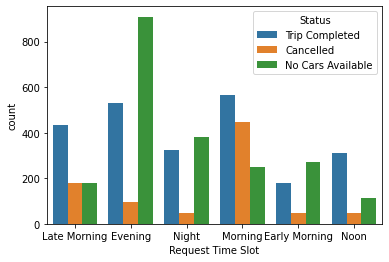

In [26]:
# Step - 6 : Graphical Analysis

# Plot to find the count of the three requests, according to the defined time slots
sns.countplot(x=df['Request Time Slot'],hue =df['Status'] ,data = df)

# Here we conclude that there were less cars available in the Evening
# and there were more cancellation in the Morning

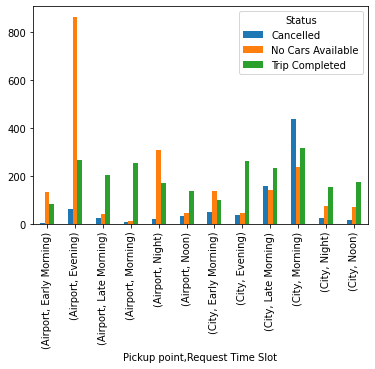

In [27]:
# Plot to find the count of the status, according to both pickup point
# and the time slot
pickup_df = pd.DataFrame(df.groupby(['Pickup point','Request Time Slot', 'Status'])['Request id'].count().unstack(fill_value=0))
pickup_df.plot.bar()

# Here we conclude that there were less cars available in the Evening at the Airport
# and also in the Morning in the City due to which there were many cancelled trips

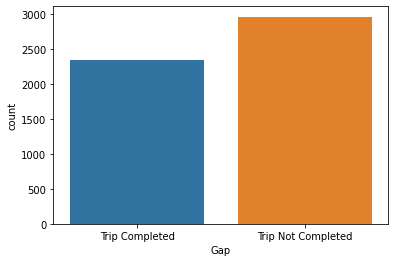

In [28]:
# Plot to count the number of requests that was completed and which was not
sns.countplot(x=df['Gap'], data = df)

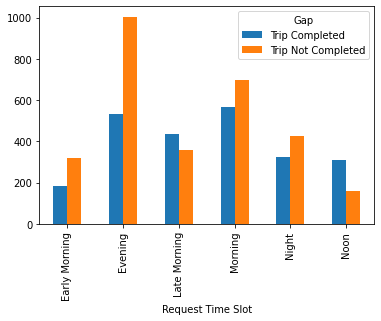

In [29]:
# Plot to count the number of requests that was completed and which was not, against the time slot
gap_timeslot_df = pd.DataFrame(df.groupby(['Request Time Slot','Gap'])['Request id'].count().unstack(fill_value=0))
gap_timeslot_df.plot.bar()

# Here, maximum trips are not completed in the evening and morning due to cancellation or unavailability of cabs 

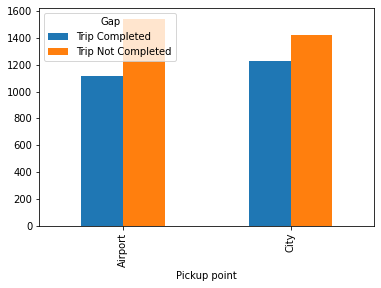

In [30]:
# Plot to count the number of requests that was completed and which was not, against pickup point
gap_pickup_df = pd.DataFrame(df.groupby(['Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_pickup_df.plot.bar()

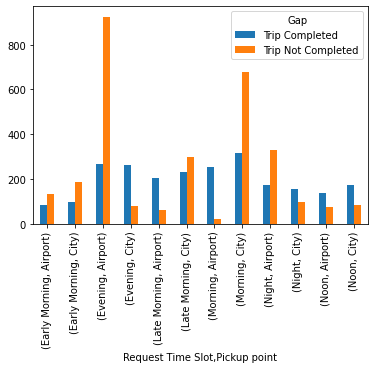

In [31]:
# Plot to count the number of requests that was completed
# and which was not, for the final analysis
gap_main_df = pd.DataFrame(df.groupby(['Request Time Slot','Pickup point','Gap'])['Request id'].count().unstack(fill_value=0))
gap_main_df.plot.bar()

In [32]:
# Uber Reviews Sentiment Analysis for Trips Completed
from google.colab import files
files.upload()

Saving Uber Reviews Data.xlsx to Uber Reviews Data.xlsx


{'Uber Reviews Data.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [33]:
#importing modules
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random
#pulling in data
df = pd.read_excel('Uber Reviews Data.xlsx')
df

,Date,Stars,Comment
0,2019-10-29,1,I had an accident with an Uber driver in Mexic...
1,2019-10-28,1,I have had my account completely hacked to whe...
2,2019-10-27,1,I requested an 8 mile ride in Boston on a Satu...
3,2019-10-27,1,I've been driving off and on with the company ...
4,2019-10-25,1,Uber is overcharging for Toll fees. When In Fl...
...,...,...,...
2342,2014-01-10,2,everyone knows uber is fast but when you had ...
2343,2013-12-18,1,For a service that asks for your credit card n...
2344,2013-12-18,2,"great service, but hiring drivers who do not k..."
2345,2013-05-13,1,Uber has several problems that make it a poor ...


In [34]:
df.shape

(2347, 3)

In [35]:
df.columns

Index(['Date', 'Stars', 'Comment'], dtype='object')

In [36]:
df.info

<bound method DataFrame.info of            Date  Stars                                            Comment
0    2019-10-29      1  I had an accident with an Uber driver in Mexic...
1    2019-10-28      1  I have had my account completely hacked to whe...
2    2019-10-27      1  I requested an 8 mile ride in Boston on a Satu...
3    2019-10-27      1  I've been driving off and on with the company ...
4    2019-10-25      1  Uber is overcharging for Toll fees. When In Fl...
...         ...    ...                                                ...
2342 2014-01-10      2  everyone knows uber  is fast but when you had ...
2343 2013-12-18      1  For a service that asks for your credit card n...
2344 2013-12-18      2  great service, but hiring drivers who do not k...
2345 2013-05-13      1  Uber has several problems that make it a poor ...
2346 2013-05-08      5  Uber is kind of like magic. You punch a few bu...

[2347 rows x 3 columns]>

In [37]:
df.describe()

,Stars
count,2347.000000
mean,1.686408
std,1.343291
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,5.000000


In [38]:
#checking for nulls
null_count = df.isnull().sum()
null_count

Date       0
Stars      0
Comment    0
dtype: int64

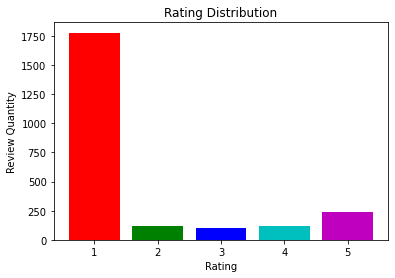

In [39]:
#seperating by groups
groups = df.groupby('Stars').count()
Values = groups.Comment
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

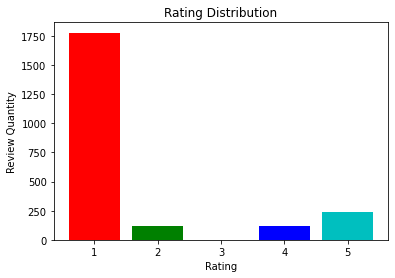

In [40]:
#deleting all instances with ride_rating = 3
df = df[df.Stars != 3]
#separating by groups
groups = df.groupby('Stars').count()
Values = groups.Comment
colors = ['r', 'g', 'b', 'c']
#making bar plot
plt.bar(([1,2,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

In [41]:
#creating new binary_class column
df['binary_class'] = np.where(df['Stars'] > 3, 1, 0)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,Stars,Comment,binary_class
0,2019-10-29,1,I had an accident with an Uber driver in Mexic...,0
1,2019-10-28,1,I have had my account completely hacked to whe...,0
2,2019-10-27,1,I requested an 8 mile ride in Boston on a Satu...,0
3,2019-10-27,1,I've been driving off and on with the company ...,0
4,2019-10-25,1,Uber is overcharging for Toll fees. When In Fl...,0
...,...,...,...,...
2342,2014-01-10,2,everyone knows uber is fast but when you had ...,0
2343,2013-12-18,1,For a service that asks for your credit card n...,0
2344,2013-12-18,2,"great service, but hiring drivers who do not k...",0
2345,2013-05-13,1,Uber has several problems that make it a poor ...,0


In [42]:
#splitting into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Comment'], df['binary_class'], random_state = 0)
#setting random number between 1 and 1000
number = random.randint(1,1000)
#printing random training text and X_train shape
print ('Random Review:')
print(' ')
# print(X_train[number])
print(' ')
print('X_train shape: ' + str(X_train.shape))

Random Review:
 
 
X_train shape: (1685,)


In [43]:
#importing countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
#creating variable which assigns X_train to numbers
vect = CountVectorizer().fit(X_train)
#translates numbers back to text
vect.get_feature_names()[1:10]

['000', '0000', '00am', '00pm', '01', '01a5756', '01pm', '02', '03']

In [44]:
#length of total words
len(vect.get_feature_names())

8146

In [45]:
#creating matrix array for logistic regression
X_train_vectorized = vect.transform(X_train)
print (X_train_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [46]:
#creating log regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
#calculating AUC
from sklearn.metrics import roc_auc_score
predictions = model.predict(vect.transform(X_test))
print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.8673540545925482


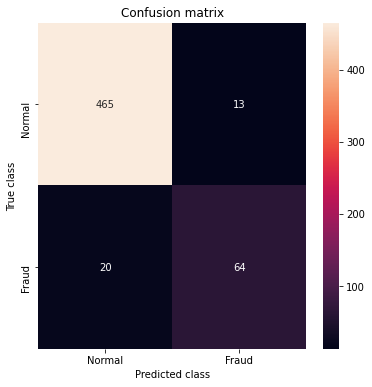

In [48]:
# Printing Confusion Matrix
from sklearn.metrics import confusion_matrix
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, predictions) 
plt.figure(figsize =(6,6)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In [49]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,matthews_corrcoef,f1_score
predictions=model.predict(vect.transform(X_test))
print(accuracy_score(y_test,predictions))
print(recall_score(y_test,predictions))
print(precision_score(y_test,predictions))
print(f1_score(y_test,predictions))
print(matthews_corrcoef(y_test,predictions))

0.9412811387900356
0.7619047619047619
0.8311688311688312
0.7950310559006212
0.7618196891297562


In [50]:
#creating array variable of all the words
feature_names = np.array(vect.get_feature_names())
#creating array of all the regression coefficients per word
coef_index = model.coef_[0]
#creating df with both arrays in it
df = pd.DataFrame({'Word':feature_names, 'Coef': coef_index})
#sorting by coefficient
df.sort_values('Coef')

,Word,Coef
1490,charged,-1.085962
2018,customer,-0.858773
4961,off,-0.854028
4836,never,-0.748185
3529,him,-0.734820
...,...,...
2508,easy,1.108701
3307,great,1.117093
6239,safe,1.117496
7677,used,1.120823


In [51]:
# Testing Custom Reviews
print(model.predict(vect.transform(['abandoned great'])))
print(model.predict(vect.transform(['great she the best'])))
print(model.predict(vect.transform(['charged slow horrible'])))
print(model.predict(vect.transform(['it was as average as a trip could be'])))
print(model.predict(vect.transform(['my family felt safe we got to our destination with ease'])))
print(model.predict(vect.transform(['i got to my destination quickly and affordably i had a smile on my face from start to finish'])))

[1]
[1]
[0]
[0]
[1]
[0]
